# Exploring CoRe database

In [30]:
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
import re
import sys
sys.path.append('../src/utils/')
import utils
from utils import *
sys.path.append('../src/')
from HDF5 import MyHDF5

## General TODO

- Check how to get EOS files and read from them

## Preparation

In [31]:
INDEX = load_index()
# As an example, show the first entry of the index
print(INDEX["BAM_0001"])

{'database_key': 'BAM:0001', 'available_runs': 'R01, R02, R03, R04', 'simulation_name': '2B_1.350_1.350_0.00_0.00_0.038', 'binary_type': 'BNS', 'reference_bibkeys': 'Bernuzzi:2014owa', 'id_code': 'LORENE', 'id_type': 'Irrotational', 'id_mass': '2.699952e+00', 'id_rest_mass': '3.050133e+00', 'id_mass_ratio': '1.000000e+00', 'id_ADM_mass': '2.677624e+00', 'id_ADM_angularmomentum': '7.662564e+00', 'id_gw_frequency_Hz': '4.545056e+02', 'id_gw_frequency_Momega22': '3.797735e-02', 'id_eos': '2B', 'id_kappa2T': '2.376117e+01', 'id_Lambda': '1.267263e+02', 'id_eccentricity': '7.092541e-03', 'id_mass_starA': '1.349976e+00', 'id_rest_mass_starA': '1.525067e+00', 'id_spin_starA': '0, 0, 0', 'id_LoveNum_kell_starA': '6.899000e-02, 1.746000e-02, 5.990000e-03', 'id_Lambdaell_starA': '1.267263e+02, 1.524837e+02, 1.776546e+02', 'id_mass_starB': '1.349976e+00', 'id_rest_mass_starB': '1.525067e+00', 'id_spin_starB': '0, 0, 0', 'id_LoveNum_kell_starB': '6.899000e-02, 1.746000e-02, 5.990000e-03', 'id_Lamb

## Getting metadata of a run

In [32]:
test_run_name = "BAM_0001"
INDEX[test_run_name]
hdf5_filename, metadata_filename = get_run_filenames(INDEX, test_run_name)
metadata = load_metadata(metadata_filename)
print(len(metadata))
metadata

available_runs:  ['R01', 'R02', 'R03', 'R04']
Chosen run: R04
49


{'database_key': 'BAM:0001:R04',
 'simulation_name': '2B_1.350_1.350_0.00_0.00_0.038_0.186',
 'binary_type': 'BNS',
 'reference_bibkeys': 'Bernuzzi:2014kca',
 'id_code': 'LORENE',
 'id_type': 'Irrotational',
 'id_mass': '2.699952e+00',
 'id_rest_mass': '3.050133e+00',
 'id_mass_ratio': '1.000000e+00',
 'id_ADM_mass': '2.677624e+00',
 'id_ADM_angularmomentum': '7.662564e+00',
 'id_gw_frequency_Hz': '4.545056e+02',
 'id_gw_frequency_Momega22': '3.797735e-02',
 'id_eos': '2B',
 'id_kappa2T': '2.376117e+01',
 'id_Lambda': '1.267263e+02',
 'id_eccentricity': '7.102151e-03',
 'id_mass_starA': '1.349976e+00',
 'id_rest_mass_starA': '1.525067e+00',
 'id_spin_starA': '0, 0, 0',
 'id_LoveNum_kell_starA': '6.899000e-02, 1.746000e-02, 5.990000e-03',
 'id_Lambdaell_starA': '1.267263e+02, 1.524837e+02, 1.776546e+02',
 'id_mass_starB': '1.349976e+00',
 'id_rest_mass_starB': '1.525067e+00',
 'id_spin_starB': '0, 0, 0',
 'id_LoveNum_kell_starB': '6.899000e-02, 1.746000e-02, 5.990000e-03',
 'id_Lambdael

## Example: HDF5 file

In [33]:
hdf5 = MyHDF5(hdf5_filename)
print(hdf5.l, hdf5.m)
print(hdf5.strain_filenames)

['energy', 'horizon', 'rh_22', 'rpsi4_22']
{'energy': ['EJ_r00650.txt', 'EJ_r00700.txt', 'EJ_r00750.txt', 'EJ_r00800.txt', 'EJ_r00850.txt', 'EJ_r00900.txt'], 'horizon': ['horizon_0'], 'rh_22': ['Rh_l2_m2_r00650.txt', 'Rh_l2_m2_r00700.txt', 'Rh_l2_m2_r00750.txt', 'Rh_l2_m2_r00800.txt', 'Rh_l2_m2_r00850.txt', 'Rh_l2_m2_r00900.txt'], 'rpsi4_22': ['Rpsi4_l2_m2_r00650.txt', 'Rpsi4_l2_m2_r00700.txt', 'Rpsi4_l2_m2_r00750.txt', 'Rpsi4_l2_m2_r00800.txt', 'Rpsi4_l2_m2_r00850.txt', 'Rpsi4_l2_m2_r00900.txt']}
Reading data OK
rh_22
2 2
['Rh_l2_m2_r00650.txt', 'Rh_l2_m2_r00700.txt', 'Rh_l2_m2_r00750.txt', 'Rh_l2_m2_r00800.txt', 'Rh_l2_m2_r00850.txt', 'Rh_l2_m2_r00900.txt']


No radius specified or radius not in data, taking largest radius


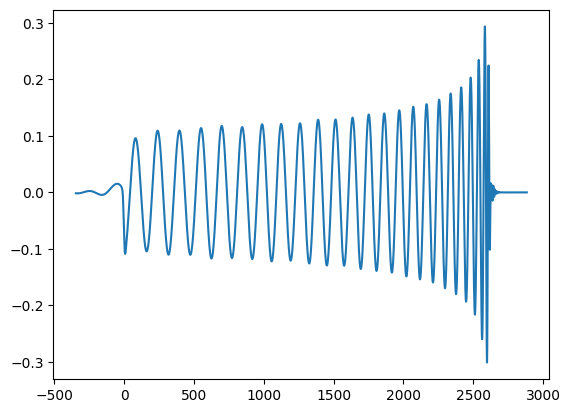

In [38]:
t, h = hdf5.get_h()
plt.plot(t, h.real)
plt.show()